In [1]:
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Load the dataset
X = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_pixel.npy")
y = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_labelpixel.npy")

# Training data (features)
inputs = [[row[0], row[1]] for row in X]

# Target values
targets = y

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: [18712349.99966252], W1: [150111.76862804], W2: [100735.28921625]

Testing the Trained Perceptron:
Accuracy: 3.9306640625%


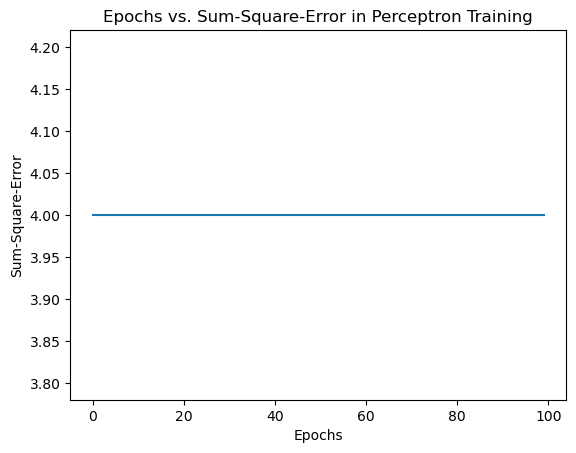

In [2]:
import matplotlib.pyplot as plt
# Plot epochs against error values
plt.plot(range(len(error_values)), error_values)
plt.xlabel('Epochs')
plt.ylabel('Sum-Square-Error')
plt.title('Epochs vs. Sum-Square-Error in Perceptron Training')
plt.show()


Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: [18712349.99966252], W1: [150111.76862804], W2: [100735.28921625]

Testing the Trained Perceptron:
Accuracy: 3.9306640625%
Number of Iterations to Converge: 100


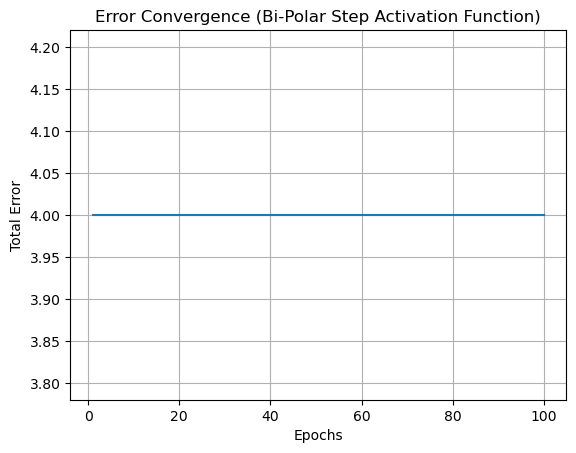


Training with Sigmoid Activation Function:
Trained Weights:
W0: [12819229.99972175], W1: [102284.94509851], W2: [68188.1519608]

Testing the Trained Perceptron:
Accuracy: 3.9306640625%
Number of Iterations to Converge: 100


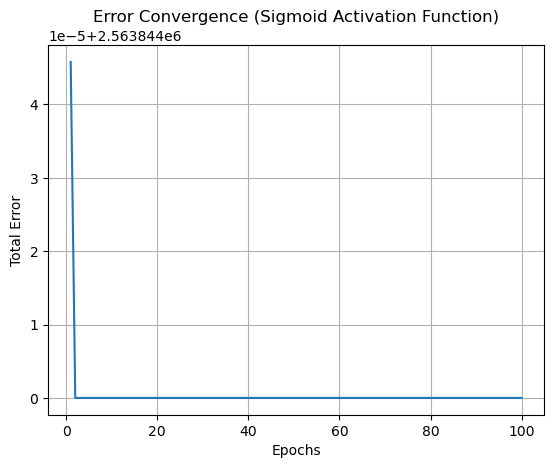


Training with ReLU Activation Function:
Trained Weights:
W0: [0.23118914], W1: [5.45582012], W2: [-13.7099233]

Testing the Trained Perceptron:
Accuracy: 4.754638671875%
Number of Iterations to Converge: 100


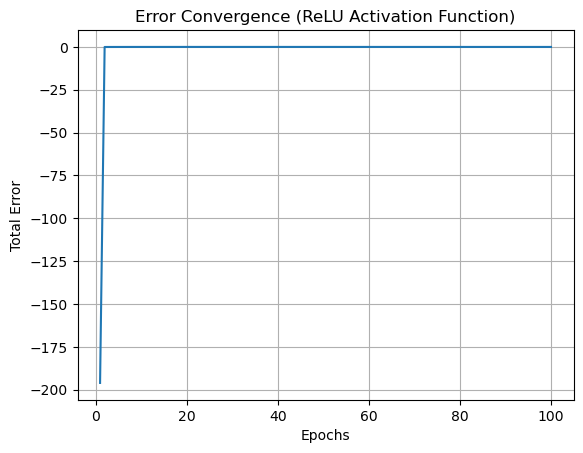

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    print("\nTesting the Trained Perceptron:")
    test_perceptron(trained_weights, inputs)
    print(f"Number of Iterations to Converge: {len(error_values)}")

    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()

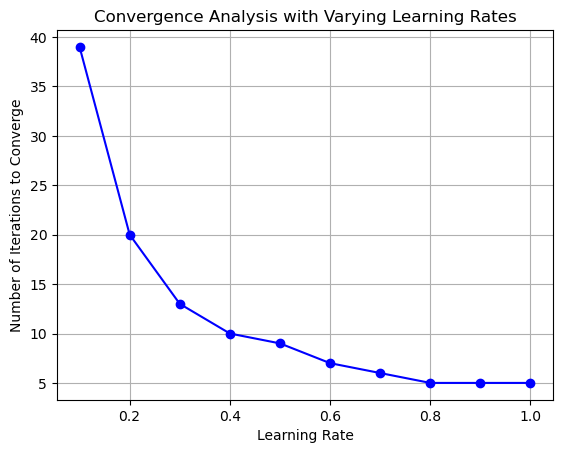

In [4]:
#A3
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 10
W1 = 0.2
W2 = -0.75
X = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_pixel.npy")
y = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_labelpixel.npy")
# Training data for AND gate
# AND gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = []

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    # Train the perceptron and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()


In [1]:
#A4
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05
X = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_pixel.npy")
y = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_labelpixel.npy")

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Train the perceptron and collect errors
trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs)

# Print the trained weights
print("Trained Weights:")
print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

# Test the perceptron
def test_perceptron(weights, data):
    correct = 0
    for i in range(len(data)):
        x1, x2 = data[i]
        target = targets[i]
        weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
        prediction = activate(weighted_sum)
        if prediction == target:
            correct += 1
        print(f"Input: ({x1}, {x2}), Target: {target}, Prediction: {prediction}")
    accuracy = (correct / len(data)) * 100
    print(f"Accuracy: {accuracy}%")

# Test the trained perceptron
print("\nTesting the Trained Perceptron:")
test_perceptron(trained_weights, inputs)


Trained Weights:
W0: 3.1499999999999897, W1: -2.1500000000000004, W2: -3.049999999999997

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 75.0%



Training with Bi-Polar Step Activation Function:
Trained Weights:
W0: 5.299999999999982, W1: -2.1000000000000005, W2: -3.049999999999997

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 1
Accuracy: 50.0%
Number of Iterations to Converge: 48


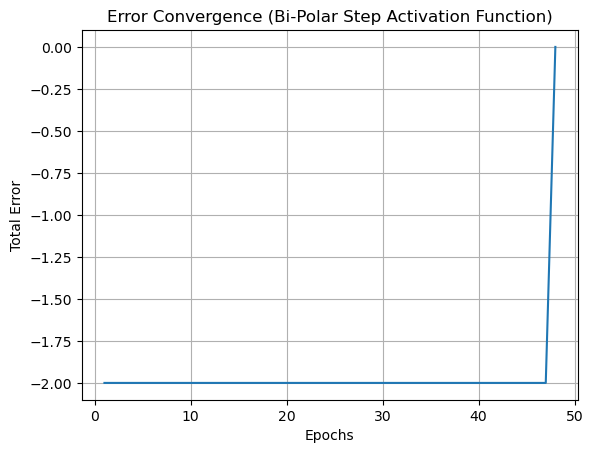


Training with Sigmoid Activation Function:
Trained Weights:
W0: 3.323546657469941, W1: -2.275099695223401, W2: -2.88628340883631

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 0
Accuracy: 75.0%
Number of Iterations to Converge: 100


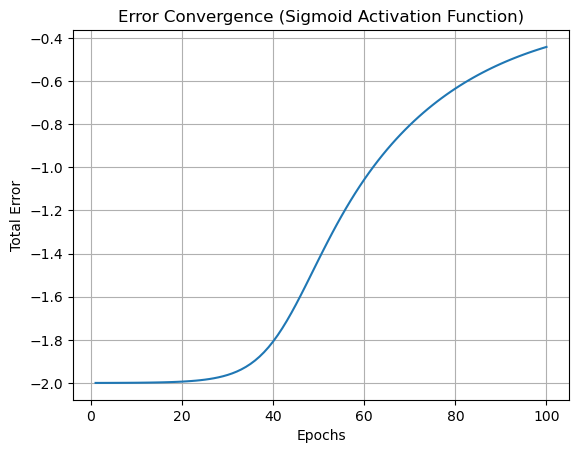


Training with ReLU Activation Function:
Trained Weights:
W0: 0.7965494907504556, W1: -0.2627717682665452, W2: -0.24417908748659964

Testing the Trained Perceptron:
Input: (0, 0), Target: 0, Prediction: 1
Input: (0, 1), Target: 1, Prediction: 1
Input: (1, 0), Target: 1, Prediction: 1
Input: (1, 1), Target: 0, Prediction: 1
Accuracy: 50.0%
Number of Iterations to Converge: 100


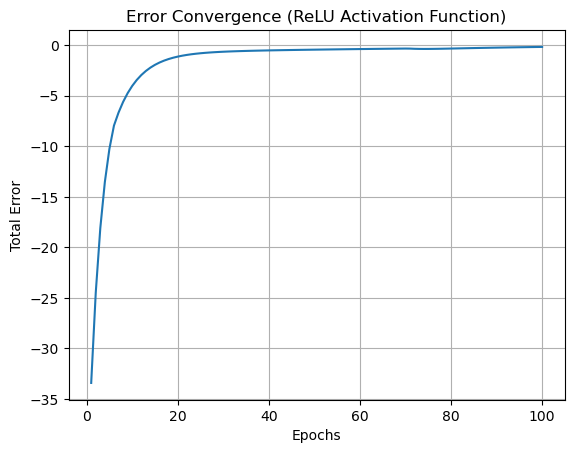

In [2]:
#A4
import numpy as np

# Define initial weights and learning rate
W0 = 10
W1 = 0.2
W2 = -0.75
learning_rate = 0.05

# Training data for AND gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

# Activation functions
def bi_polar_step_activation(sum):
    return -1 if sum < 0 else 1

def sigmoid_activation(sum):
    return 1 / (1 + np.exp(-sum))

def relu_activation(sum):
    return max(0, sum)

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data, activation_fn):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Apply the selected activation function
            activated_sum = activation_fn(weighted_sum)
            # Calculate the error
            error = target - activated_sum
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return weights, errors

# Test different activation functions and compare iterations
activation_functions = [("Bi-Polar Step", bi_polar_step_activation),
                        ("Sigmoid", sigmoid_activation),
                        ("ReLU", relu_activation)]

for activation_name, activation_fn in activation_functions:
    print(f"\nTraining with {activation_name} Activation Function:")
    trained_weights, error_values = train_perceptron([W0, W1, W2], learning_rate, 100, inputs, activation_fn)
    print("Trained Weights:")
    print(f"W0: {trained_weights[0]}, W1: {trained_weights[1]}, W2: {trained_weights[2]}")

    print("\nTesting the Trained Perceptron:")
    test_perceptron(trained_weights, inputs)
    print(f"Number of Iterations to Converge: {len(error_values)}")

    import matplotlib.pyplot as plt
    plt.plot(range(1, len(error_values) + 1), error_values)
    plt.xlabel('Epochs')
    plt.ylabel('Total Error')
    plt.title(f'Error Convergence ({activation_name} Activation Function)')
    plt.grid(True)
    plt.show()


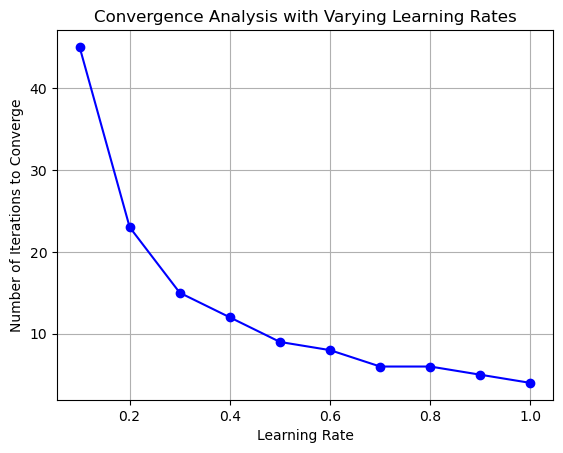

In [3]:
#A4
import numpy as np
import matplotlib.pyplot as plt

# Define initial weights
W0 = 10
W1 = 0.2
W2 = -0.75
X = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_pixel.npy")
y = np.load(r"C:\Users\Srikanth\Downloads\ML\ML-lab3-main\activation_maps_lines_image52_labelpixel.npy")

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 1, 1, 0])

def activate(sum):
    return 1 if sum >= 0 else 0

# Perceptron training function
def train_perceptron(weights, learning_rate, max_epochs, data):
    errors = []  # To store error values for each epoch
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2 = data[i]
            target = targets[i]
            # Calculate the weighted sum
            weighted_sum = weights[0] + weights[1] * x1 + weights[2] * x2
            # Calculate the error
            error = target - activate(weighted_sum)
            total_error += error
            # Update weights
            weights[0] += learning_rate * error
            weights[1] += learning_rate * error * x1
            weights[2] += learning_rate * error * x2
        errors.append(total_error)
        if total_error == 0:
            break
    return errors

# Varying learning rates
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
iteration_counts = []

for lr in learning_rates:
    # Clone the initial weights to keep them the same for each learning rate
    weights = [W0, W1, W2]
    # Train the perceptron and collect errors
    error_values = train_perceptron(weights, lr, 100, inputs)
    iteration_counts.append(len(error_values))

# Plot the number of iterations vs. learning rates
plt.plot(learning_rates, iteration_counts, marker='o', linestyle='-', color='b')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations to Converge')
plt.title('Convergence Analysis with Varying Learning Rates')
plt.grid(True)
plt.show()

In [4]:
#A5
import numpy as np

# Define initial weights and learning rate
W0 = 0.1
W1 = 0.1
W2 = 0.1
W3 = 0.1
learning_rate = 0.1

# Training data
data = np.array([
    [20, 6, 2, 386],
    [16, 3, 6, 289],
    [27, 6, 2, 393],
    [19, 1, 2, 110],
    [24, 4, 2, 280],
    [22, 1, 5, 167],
    [15, 4, 2, 271],
    [18, 4, 2, 274],
    [21, 1, 4, 148],
    [16, 2, 4, 198]
])

# Target values (High Value or Low Value)
targets = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict(x1, x2, x3, x4):
    weighted_sum = W0 + W1 * x1 + W2 * x2 + W3 * x3
    return sigmoid(weighted_sum)

def train_perceptron(max_epochs, data, targets):
    global W0, W1, W2, W3  # Declare global variables
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(data)):
            x1, x2, x3, x4 = data[i]
            target = targets[i]
            prediction = predict(x1, x2, x3, x4)
            error = target - prediction
            total_error += error
            W0 += learning_rate * error
            W1 += learning_rate * error * x1
            W2 += learning_rate * error * x2
            W3 += learning_rate * error * x3
        if total_error == 0:
            break

# Train the perceptron
train_perceptron(1000, data, targets)

# Test the perceptron and print the results
for i in range(len(data)):
    x1, x2, x3, x4 = data[i]
    prediction = predict(x1, x2, x3, x4)
    classification = "Yes" if prediction >= 0.5 else "No"
    print(f"Customer C_{i + 1}: {classification}")


Customer C_1: Yes
Customer C_2: Yes
Customer C_3: Yes
Customer C_4: No
Customer C_5: Yes
Customer C_6: No
Customer C_7: Yes
Customer C_8: Yes
Customer C_9: No
Customer C_10: No


In [5]:
#A6
# Calculate the pseudo-inverse of the data
pseudo_inverse = np.linalg.pinv(data)
print("Pseudo inverse is",pseudo_inverse)

Pseudo inverse is [[-0.01158602 -0.03328061  0.00992701  0.0309081   0.01893411  0.01257157
  -0.00872551  0.00049436  0.01868374 -0.00579619]
 [ 0.00809324 -0.03931864  0.02004214  0.01022259  0.01645572 -0.01682076
   0.00109285  0.00621381 -0.00780631 -0.0171085 ]
 [-0.02400235  0.12210231 -0.06177958 -0.03305478 -0.05136901  0.05064536
  -0.00279828 -0.01898852  0.02274531  0.05261889]
 [ 0.00150006  0.00203556  0.00021249 -0.0018353  -0.00064341 -0.00095362
   0.00101203  0.00046022 -0.00124752  0.00037604]]


In [6]:
#A7
import numpy as np

class ANDGateNeuralNetwork:
    def __init__(self, learning_rate=0.05):
        self.weights_ih = np.random.randn(2, 2)
        self.weights_ho = np.random.randn(1, 2)
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagate(self, inputs):
        h = self.sigmoid(np.dot(self.weights_ih, inputs))
        o = self.sigmoid(np.dot(self.weights_ho, h))
        return o

    def backpropagate(self, inputs, target_output, actual_output, h):
        error = target_output - actual_output

        gradient_ho = error * actual_output * (1 - actual_output)
        gradient_ih = (gradient_ho @ self.weights_ho) * h * (1 - h)

        self.weights_ho += self.learning_rate * np.outer(gradient_ho, h)
        self.weights_ih += self.learning_rate * np.outer(gradient_ih, inputs)

    def train(self, training_examples):
        for inputs, target_output in training_examples:
            h = self.sigmoid(np.dot(self.weights_ih, inputs))
            actual_output = self.forward_propagate(inputs)
            self.backpropagate(inputs, target_output, actual_output, h)

    def predict(self, inputs):
        return self.forward_propagate(inputs)

# Create a new AND gate neural network
network = ANDGateNeuralNetwork()

# Train the network on the AND gate truth table
training_examples = [(np.array([0, 0]), 0), (np.array([0, 1]), 0), (np.array([1, 0]), 0), (np.array([1, 1]), 1)]
network.train(training_examples)

# Test the network for multiple inputs
inputs_list = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]

for inputs in inputs_list:
    output = network.predict(inputs)
    print(f"Input: {inputs}, Output: {output}")


Input: [0 0], Output: [0.36403072]
Input: [0 1], Output: [0.34653093]
Input: [1 0], Output: [0.41366656]
Input: [1 1], Output: [0.39713247]


In [8]:
#A8
import numpy as np

class XORGateNeuralNetwork:
    def __init__(self, learning_rate=0.05):
        self.weights_ih = np.random.randn(2, 2)
        self.weights_ho = np.random.randn(1, 2)
        self.learning_rate = learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def forward_propagate(self, inputs):
        h = self.sigmoid(np.dot(self.weights_ih, inputs))
        o = self.sigmoid(np.dot(self.weights_ho, h))
        return o

    def backpropagate(self, inputs, target_output, actual_output, h):
        error = target_output - actual_output

        gradient_ho = error * actual_output * (1 - actual_output)
        gradient_ih = (gradient_ho @ self.weights_ho) * h * (1 - h)

        self.weights_ho += self.learning_rate * np.outer(gradient_ho, h)
        self.weights_ih += self.learning_rate * np.outer(gradient_ih, inputs)

    def train(self, training_examples):
        for inputs, target_output in training_examples:
            h = self.sigmoid(np.dot(self.weights_ih, inputs))
            actual_output = self.forward_propagate(inputs)
            self.backpropagate(inputs, target_output, actual_output, h)

    def predict(self, inputs):
        return self.forward_propagate(inputs)

# Create a new XOR gate neural network
network = XORGateNeuralNetwork()

# Train the network on the XOR gate truth table
training_examples = [(np.array([0, 0]), 0), (np.array([0, 1]), 1), (np.array([1, 0]), 1), (np.array([1, 1]), 0)]
network.train(training_examples)

# Test the network for multiple inputs
inputs_list = [np.array([0, 0]), np.array([0, 1]), np.array([1, 0]), np.array([1, 1])]

for inputs in inputs_list:
    output = network.predict(inputs)
    print(f"Input: {inputs}, Output: {output}")


Input: [0 0], Output: [0.63773733]
Input: [0 1], Output: [0.61144642]
Input: [1 0], Output: [0.56874374]
Input: [1 1], Output: [0.55435132]


In [9]:
#A9
import numpy as np

class ANDGatePerceptron:
    def __init__(self, learning_rate=0.05):
        self.weights = np.random.randn(2)
        self.bias = np.random.randn(1)
        self.learning_rate = learning_rate

    def forward_propagate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = np.where(weighted_sum >= 0, 1, 0)
        return output

    def backpropagate(self, inputs, target_output, actual_output):
        error = target_output - actual_output
        delta = error * self.learning_rate
        self.weights += delta * inputs
        self.bias += delta

    def train(self, training_examples):
        for inputs, target_output in training_examples:
            actual_output = self.forward_propagate(inputs)
            self.backpropagate(inputs, target_output, actual_output)

    def predict(self, inputs):
        return self.forward_propagate(inputs)

# Create a new perceptron
perceptron = ANDGatePerceptron()

# Create a training dataset
training_examples = [(np.array([0, 0]), np.array([0])), (np.array([0, 1]), np.array([0])), (np.array([1, 0]), np.array([0])), (np.array([1, 1]), np.array([1]))]

# Train the perceptron
perceptron.train(training_examples)

# Test the perceptron
inputs = np.array([1, 1])
output = perceptron.predict(inputs)

# Print the output
print(output)



import numpy as np
from sklearn.neural_network import MLPClassifier

# Create an XOR gate dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create an MLPClassifier with one hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=10000, random_state=42)

# Train the model
mlp.fit(X, y)

# Test the model
inputs = np.array([[1, 1]])
output = mlp.predict(inputs)

# Print the output
print(output)



[0]
[1]


In [10]:
#A9
import numpy as np

class Perceptron:
    def __init__(self, num_inputs, learning_rate=0.05):
        self.weights = np.random.randn(num_inputs)
        self.learning_rate = learning_rate

    def forward_propagate(self, inputs):
        weighted_sum = np.dot(inputs, self.weights)
        output = 1 / (1 + np.exp(-weighted_sum))  # Use sigmoid activation
        return output

    def backpropagate(self, inputs, target_output, actual_output):
        error = target_output - actual_output
        delta = error * actual_output * (1 - actual_output)
        self.weights += self.learning_rate * delta * inputs

    def train(self, training_examples, num_epochs=100):
        for epoch in range(num_epochs):
            for inputs, target_output in training_examples:
                actual_output = self.forward_propagate(inputs)
                self.backpropagate(inputs, target_output, actual_output)

    def predict(self, inputs):
        return self.forward_propagate(inputs)

# Create a new perceptron with 2 input features (for AND and XOR)
num_inputs = 2
perceptron = Perceptron(num_inputs)

# Create a training dataset for AND
training_and = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 0),
    (np.array([1, 0]), 0),
    (np.array([1, 1]), 1)
]

# Create a training dataset for XOR
training_xor = [
    (np.array([0, 0]), 0),
    (np.array([0, 1]), 1),
    (np.array([1, 0]), 1),
    (np.array([1, 1]), 0)
]

# Train the perceptron for AND
perceptron.train(training_and)

# Test the perceptron for AND
inputs_and = np.array([1, 1])
output_and = perceptron.predict(inputs_and)
print("AND Gate:", output_and)

# Train the perceptron for XOR
perceptron.train(training_xor)

# Test the perceptron for XOR
inputs_xor = np.array([1, 1])
output_xor = perceptron.predict(inputs_xor)
print("XOR Gate:", output_xor)

for inputs in inputs_list:
    output = network.predict(inputs)
    print(f"Input: {inputs}, Output: {output}")


AND Gate: 0.6371888630016345
XOR Gate: 0.561293214469459
Input: [0 0], Output: [0.63773733]
Input: [0 1], Output: [0.61144642]
Input: [1 0], Output: [0.56874374]
Input: [1 1], Output: [0.55435132]


In [12]:
#A10
import numpy as np
from sklearn.neural_network import MLPClassifier

# Training data for XOR gate
# XOR gate truth table: inputs and corresponding outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create an MLPClassifier with one hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.05, max_iter=100)

# Train the classifier
mlp.fit(X, y)

# Print the trained weights and biases
print("Trained Weights (Coefs):")
print(mlp.coefs_)
print("Trained Biases (Intercepts):")
print(mlp.intercepts_)

# Test the trained classifier
def test_classifier(classifier, data, targets):
    predictions = classifier.predict(data)
    accuracy = (sum(predictions == targets) / len(targets)) * 100
    print("Predictions:", predictions)
    print("Accuracy:", accuracy, "%")

# Test the trained classifier
print("\nTesting the Trained Classifier:")
test_classifier(mlp, X, y)


Trained Weights (Coefs):
[array([[-0.52565007,  0.25903799],
       [-0.14525811, -0.21547253]]), array([[-0.68263473],
       [-0.24393704]])]
Trained Biases (Intercepts):
[array([-0.26813573, -0.12375966]), array([0.38072721])]

Testing the Trained Classifier:
Predictions: [0 1 1 1]
Accuracy: 75.0 %
